In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import scipy
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import math

##### Esto se puede hacer con la librería de Pandas

In [2]:
df=pd.read_excel("AnalisisDatos.xlsx",dtype=object)
df.drop('Marca temporal', axis=1, inplace=True) #Se elimina la marca temporal
df.shape #Cuantas filas y columnas hay 

(211, 3)

In [3]:
df.head()

,¿Cuál es su estatura en centímetros?,¿Cuál es su talla de calzado?,Sexo
0,169,27.5,Masculino
1,175,26,Masculino
2,173,27,Masculino
3,173,27,Femenino
4,175,26,Masculino


In [4]:
df.dtypes #Se checa el tipo de cada columna

¿Cuál es su estatura en centímetros?    object
¿Cuál es su talla de calzado?           object
Sexo                                    object
dtype: object

In [5]:
#Se renombran las columnas
df.rename(columns = {'¿Cuál es su estatura en centímetros?':'Estatura', '¿Cuál es su talla de calzado?':'Talla_Calzado'}, inplace = True)
df.head()

,Estatura,Talla_Calzado,Sexo
0,169,27.5,Masculino
1,175,26,Masculino
2,173,27,Masculino
3,173,27,Femenino
4,175,26,Masculino


Es necesario reemplazar o eliminar ciertos datos para sacar las medidas de tendencia central

In [6]:
df["Estatura"]=df["Estatura"].astype(str) #Se convierte a string
df['Estatura']=df['Estatura'].str.strip(' cmst') #Se quitan todos los caracteres no numéricos
df['Estatura']=df['Estatura'].str.replace(',','')
df['Estatura']=df['Estatura'].apply(lambda a: str("%.2f" % round(float(a),2)).replace(".","")[0:3] if float(a)<2.0 else a)
df["Estatura"]=df["Estatura"].astype('float64') #Se regresa a float
df["Talla_Calzado"]=df["Talla_Calzado"].astype('float64')
df.dropna() #Se borran filas vacías o inválidos
df.dtypes #Se checa que todo quede en el tipo adecuado

Estatura         float64
Talla_Calzado    float64
Sexo              object
dtype: object

In [7]:
df.head()

,Estatura,Talla_Calzado,Sexo
0,169.0,27.5,Masculino
1,175.0,26.0,Masculino
2,173.0,27.0,Masculino
3,173.0,27.0,Femenino
4,175.0,26.0,Masculino


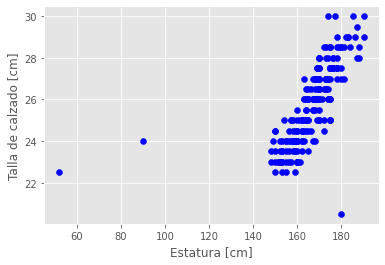

In [8]:
plt.style.use('ggplot')
fig, ax = plt.subplots()
ax.scatter(df[["Estatura"]],df[["Talla_Calzado"]],color="blue")
ax.set_xlabel("Estatura [cm]")
ax.set_ylabel("Talla de calzado [cm]")
fig.show()

Vemos que hay tres datos muy alejados de los demás valores, por lo que se eliminan para un mejor análisis

In [9]:
df.iloc[[25,49,178]]

,Estatura,Talla_Calzado,Sexo
25,180.0,20.5,Masculino
49,52.0,22.5,Femenino
178,90.0,24.0,Femenino


In [10]:
df.drop(index=[25,49,178],inplace=True)

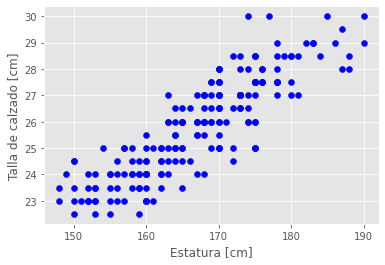

In [11]:
plt.style.use('ggplot')
fig, ax = plt.subplots()
ax.scatter(df[["Estatura"]],df[["Talla_Calzado"]],color="blue")
ax.set_xlabel("Estatura [cm]")
ax.set_ylabel("Talla de calzado [cm]")
fig.show()

In [12]:
df.shape

(208, 3)

### 1. Obtener las medidas de tendencia central para estatura y talla de calzado

Ahora si se obtienen las medidas de tendencia central

In [13]:
df.describe()

,Estatura,Talla_Calzado
count,208.000000,208.000000
mean,167.211538,25.836538
std,9.330924,1.872045
min,148.000000,22.500000
25%,160.000000,24.000000
50%,168.000000,26.000000
75%,174.000000,27.500000
max,190.000000,30.000000


### 2. Encontrar la función gaussiana que mejor ajuste a las curvas asumiendo una distribución normal

In [14]:
#Los valores de miu y sigma para cada tipo son:
miu_Est=df["Estatura"].mean()
miu_Talla=df["Talla_Calzado"].mean()
sigma_Est=df["Estatura"].std()
sigma_Talla=df["Talla_Calzado"].std()
print("El valor de miu para la Estatura es: ",miu_Est)
print("El valor de sigma para la Estatura es: ",sigma_Est)
print("El valor de miu para la Talla de Calzado es: ",miu_Talla)
print("El valor de sigma para la Talla de Calzado es: ",sigma_Talla)

El valor de miu para la Estatura es:  167.21153846153845
El valor de sigma para la Estatura es:  9.330924199347699
El valor de miu para la Talla de Calzado es:  25.83653846153846
El valor de sigma para la Talla de Calzado es:  1.8720449276323337


### 3. Graficar histogramas y funciones gaussianas

In [15]:
def func(sigma,miu,x):
  y=1/(np.sqrt(2*np.pi)*sigma)*np.exp(-(x-miu)**2/(2*sigma**2))
  return y

In [16]:
X_Est=np.linspace(130,200,num=200)
X_Talla=np.linspace(19.5,32,num=200)
Y_Est=func(sigma_Est,miu_Est,X_Est)
Y_Talla=func(sigma_Talla,miu_Talla,X_Talla)

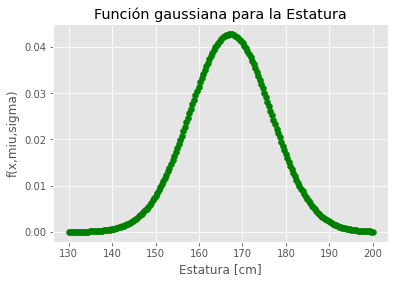

In [17]:
fig, ax = plt.subplots()
ax.scatter(X_Est,y=Y_Est,color="green")
ax.set_xlabel("Estatura [cm]")
ax.set_ylabel("f(x,miu,sigma)")
ax.set_title("Función gaussiana para la Estatura")
fig.show()

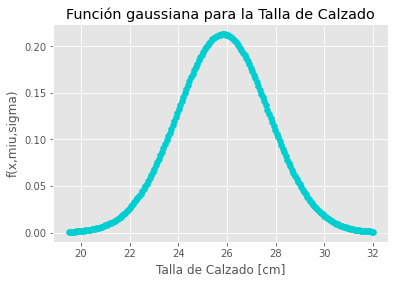

In [18]:
fig, ax = plt.subplots()
ax.scatter(X_Talla,y=Y_Talla,color="darkturquoise")
ax.set_xlabel("Talla de Calzado [cm]")
ax.set_ylabel("f(x,miu,sigma)")
ax.set_title("Función gaussiana para la Talla de Calzado")
fig.show()

In [19]:
q3_Est,q1_Est=np.percentile(df["Estatura"],[75 ,25])
q3_Talla,q1_Talla=np.percentile(df["Talla_Calzado"],[75 ,25])
iqr_Est=q3_Est-q1_Est
iqr_Talla=q3_Talla-q1_Talla
#Ancho ideal de acuerdo con la regla de Freedman–Diaconis
bwidth_Est=2*iqr_Est/(np.cbrt(df.shape[0]))
bwidth_Talla=2*iqr_Talla/(np.cbrt(df.shape[0]))
print(bwidth_Est)
print(bwidth_Talla)

4.725744668254145
1.1814361670635363


In [20]:
nbins_Est=math.ceil((df["Estatura"].max()-df["Estatura"].min())/bwidth_Est)
nbins_Talla=math.ceil((df["Talla_Calzado"].max()-df["Talla_Calzado"].min())/bwidth_Talla)

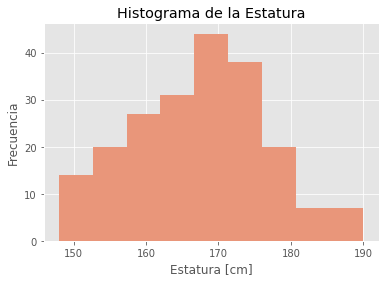

In [21]:
fig, ax = plt.subplots()
ax.hist(df["Estatura"], range=(df["Estatura"].min(),df["Estatura"].max()), bins = nbins_Est, density=False,color="darksalmon")
ax.set_xlabel("Estatura [cm]")
ax.set_ylabel("Frecuencia")
ax.set_title("Histograma de la Estatura")
fig.show()

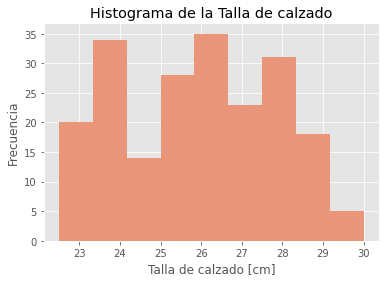

In [22]:
fig, ax = plt.subplots()
ax.hist(df["Talla_Calzado"], range=(df["Talla_Calzado"].min(),df["Talla_Calzado"].max()), bins = nbins_Est, density=False,color="darksalmon")
ax.set_xlabel("Talla de calzado [cm]")
ax.set_ylabel("Frecuencia")
ax.set_title("Histograma de la Talla de calzado")
fig.show()

### 4. Encontrar la probabilidad de que una persona tomada al azar se encuentre dentro de la primera desviación estándar para cada variable

In [23]:
P_Est=scipy.stats.norm(loc=miu_Est, scale=sigma_Est)
P_Talla=scipy.stats.norm(loc=miu_Talla, scale=sigma_Talla)

print("La probabilidad para la Estatura sería de: ",200*P_Est.cdf(miu_Est+sigma_Est)-100)
print("La probabilidad para la Talla de Calzado sería de: ",200*P_Talla.cdf(miu_Talla+sigma_Talla)-100)

La probabilidad para la Estatura sería de:  68.26894921370857
La probabilidad para la Talla de Calzado sería de:  68.2689492137086


### 5. Hallar una aproximación lineal a la relación entre estatura y talla de calzado. Tanto para la población general como para subgrupos divididos por sexo y comparar

Regresión en general

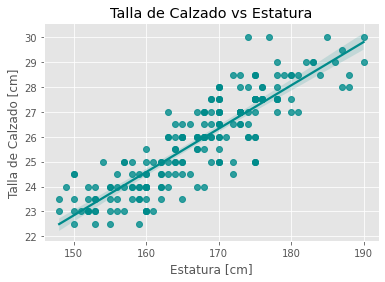

In [24]:
sns.regplot(x="Estatura",y="Talla_Calzado",data=df,color="darkcyan")
plt.title("Talla de Calzado vs Estatura")
plt.xlabel("Estatura [cm]") 
plt.ylabel("Talla de Calzado [cm]") 
plt.show()

In [32]:
aprox=LinearRegression(fit_intercept=True)
aprox.fit(df[["Estatura"]],df[["Talla_Calzado"]])
print("Talla_Calzado={}*Estatura{}".format(aprox.coef_[0,0].round(4),aprox.intercept_[0].round(4)))
print("R^2: ",r2_score(df[["Talla_Calzado"]],aprox.predict(df[["Estatura"]])))

Talla_Calzado=0.1742*Estatura-3.2976


0.7542059296462005

Regresión para cada sexo

In [26]:
df2=df[df["Sexo"]=="Masculino"]
df2

,Estatura,Talla_Calzado,Sexo
0,169.0,27.5,Masculino
1,175.0,26.0,Masculino
2,173.0,27.0,Masculino
4,175.0,26.0,Masculino
8,170.0,28.0,Masculino
...,...,...,...
206,175.0,27.5,Masculino
207,173.0,26.5,Masculino
208,176.0,27.5,Masculino
209,178.0,28.5,Masculino


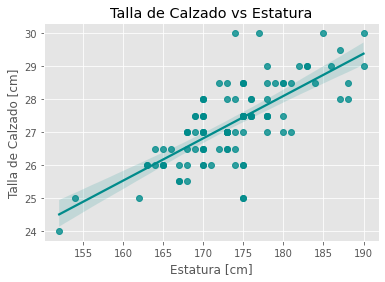

In [27]:
sns.regplot(x="Estatura",y="Talla_Calzado",data=df2,color="darkcyan")
plt.title("Talla de Calzado vs Estatura")
plt.xlabel("Estatura [cm]") 
plt.ylabel("Talla de Calzado [cm]") 
plt.show()

In [33]:
aprox2=LinearRegression(fit_intercept=True)
aprox2.fit(df2[["Estatura"]],df2[["Talla_Calzado"]])
print("Talla_Calzado={}*Estatura+{}".format(aprox2.coef_[0,0].round(4),aprox2.intercept_[0].round(4)))
print("R^2: ",r2_score(df2[["Talla_Calzado"]],aprox2.predict(df2[["Estatura"]])))

Talla_Calzado=0.1284*Estatura+4.9857
R^2:  0.5354465975346546


In [29]:
df3=df[df["Sexo"]=="Femenino"]
df3

,Estatura,Talla_Calzado,Sexo
3,173.0,27.0,Femenino
5,168.0,26.0,Femenino
6,162.0,25.0,Femenino
7,169.0,26.0,Femenino
9,153.0,24.0,Femenino
...,...,...,...
198,163.0,25.0,Femenino
199,156.0,24.0,Femenino
200,175.0,25.0,Femenino
203,162.0,24.5,Femenino


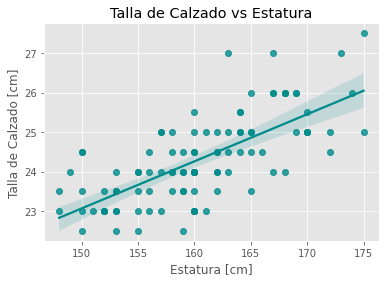

In [30]:
sns.regplot(x="Estatura",y="Talla_Calzado",data=df3,color="darkcyan")
plt.title("Talla de Calzado vs Estatura")
plt.xlabel("Estatura [cm]") 
plt.ylabel("Talla de Calzado [cm]") 
plt.show()

In [34]:
aprox3=LinearRegression(fit_intercept=True)
aprox3.fit(df3[["Estatura"]],df3[["Talla_Calzado"]])
print("Talla_Calzado={}*Estatura+{}".format(aprox3.coef_[0,0].round(4),aprox3.intercept_[0].round(4)))
print("R^2: ",r2_score(df3[["Talla_Calzado"]],aprox3.predict(df3[["Estatura"]])))

Talla_Calzado=0.1191*Estatura+5.2106
R^2:  0.4925677585007695
